 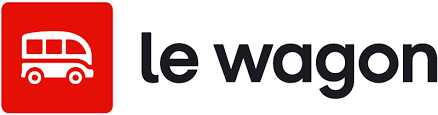

# Greenweez Retention Matrix


In this challenge, we will study the impact of COVID-19 on Greenweez, with a focus on customer retention.



There have been 3 lockdowns in France during the COVID-19 pandemic:


- **March 17 to May 11, 2020**, i.e. 1 month and 25 days;
- **October 30 to December 15, 2020**, i.e. 1 month and 15 days;
- **April 3 to May 3, 2021**, i.e. 28 days.

## Turnover Analysis


### Yearly Analysis



Load Greenweez orders by executing the following cell. \
It may take a few minutes to execute

In [1]:
from google_auth_oauthlib.flow import InstalledAppFlow

SCOPES = ["https://www.googleapis.com/auth/bigquery"]


flow = InstalledAppFlow.from_client_secrets_file(
    "client_secrets.json",
    scopes=SCOPES
)

creds = flow.run_local_server(port=0)

print("Autenticação concluída!")

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=756995814547-628u7gu3u990plc8b5t7vrqvimldmlp7.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A54503%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=Vf0uP4dT79kF2dtYkI3a8LpdYDYzl4&access_type=offline
Abrindo em uma sessão de navegador existente.
Autenticação concluída!


In [2]:
from google.cloud import bigquery

project_id = 'sanguine-stock-438207-v6'
client = bigquery.Client(credentials=creds, project=project_id)

print("✅ Conectado ao BigQuery com sucesso!")

✅ Conectado ao BigQuery com sucesso!


In [3]:
query = """
    SELECT *
    FROM `sanguine-stock-438207-v6.course_17.gwz_orders_17`
"""

query_job = client.query(query)

In [4]:
import pandas as pd
df = query_job.to_dataframe()

/home/olamarujo/Projetos/Le Wagon/Python/le_wagon-python-env/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [5]:
df

,date_date,customers_id,orders_id,turnover,margin,shipping_fee,operationnal_cost
0,2021-04-01,275664,825526,20.70,7.77,5.76,5.50
1,2021-04-01,275817,826308,23.79,7.79,8.87,5.50
2,2021-04-01,132578,826280,24.44,9.37,6.15,5.50
3,2021-04-01,167950,825740,45.08,3.74,5.78,6.50
4,2021-04-01,18511,825865,35.56,5.53,4.11,6.50
...,...,...,...,...,...,...,...
142404,2021-08-31,94569,974691,56.02,14.93,3.24,5.80
142405,2021-08-31,143620,975167,35.87,13.63,3.24,5.80
142406,2021-08-31,117179,974815,58.04,11.43,3.24,7.65
142407,2021-08-31,192997,975054,50.62,17.75,3.24,8.80


Convert the column `date_date` to **datetime**.


In [6]:
df['date_date'] = pd.to_datetime(df['date_date'])

Set the column `date_date` as index

In [7]:
df.set_index('date_date', inplace=True)

Calculate the total turnover per month using the `.resample()` method and store the results in a DataFrame `df_m_turnover`.

In [8]:
df_m_turnover = df['turnover'].resample('M').sum().reset_index()
df_m_turnover

/tmp/ipykernel_27596/2987464257.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_m_turnover = df['turnover'].resample('M').sum().reset_index()


,date_date,turnover
0,2021-04-30,2552424.92
1,2021-05-31,2293246.08
2,2021-06-30,2155114.15
3,2021-07-31,1954372.03
4,2021-08-31,1903019.04


Calculate the evolution evolution of revenue:

<u>Hint:</u> the `.pct_change()` method can help you.

In [9]:
df_m_turnover['turnover'].pct_change()

0         NaN
1   -0.101542
2   -0.060234
3   -0.093147
4   -0.026276
Name: turnover, dtype: float64

---

Let's dive deeper in the analysis to assess if the turnover increase comes from new customers or from an increase of the average basket.

### Order values analysis




Plot the result using **Plotly Express**. 📈 \
Can you identify a peak in this chart? On which month?

In [10]:
import plotly.express as px
px.line(df_m_turnover,x='date_date', y= 'turnover').show()

MAY

Plot a similar chart showing the **average** turnover instead. What do you notice?

In [11]:
df_m_turnover['turnover_mean'] = df_m_turnover['turnover'].mean()
px.line(df_m_turnover,x='date_date', y= 'turnover_mean').show()

### Customer base analysis


We will consider that a customer is new at the moment he places his first order. \
What does the following line of code do?


In [12]:
df_first_orders = df.reset_index().groupby("customers_id", as_index=False).first()
df_first_orders

,customers_id,date_date,orders_id,turnover,margin,shipping_fee,operationnal_cost
0,10,2021-06-24,915362,79.93,21.47,3.65,10.15
1,14,2021-05-16,879103,80.28,24.61,0.88,6.95
2,15,2021-04-17,845941,115.84,43.30,0.00,11.05
3,18,2021-07-13,934071,2.48,0.81,9.38,4.90
4,21,2021-05-05,867585,53.87,20.98,5.83,6.50
...,...,...,...,...,...,...,...
90365,309394,2021-08-31,975436,11.77,4.40,8.25,5.05
90366,309395,2021-08-31,975444,70.37,27.10,3.44,9.60
90367,309397,2021-08-31,975449,69.72,28.27,0.00,8.10
90368,309398,2021-08-31,975452,38.93,11.14,0.00,7.40


Get the first row that correspond to each customer

From `df_first_orders`, compute the number of new customers per month. Store the results in a new DataFrame called`df_new_customers`.


<details>
    <summary> Hint 🔍</summary>

No need to set the date_date column as index, you can use the "on" parameter of the `resample()` function
</details>



In [13]:
df_first_orders['month'] = df_first_orders['date_date'].dt.month

df_new_customers = df_first_orders.groupby('month').customers_id.count().reset_index()
df_new_customers

,month,customers_id
0,4,25802
1,5,19865
2,6,16356
3,7,14655
4,8,13692


Plot the number of new customers in a graph with **Plotly Express**.

Which months have the most new customers ?

In [14]:
px.bar(df_new_customers, x='month', y='customers_id')

April

## Retention Matrix

We will now study the customer retention to go gain additional insights on our previous findings. \
To do so, we will do a **cohort analysis**.

---

### Data Transformation

Change the `date_date` column name in `df_first_orders` to `member_at`.

<details>
    <summary> Hint 🔍</summary>

Have a look at the `.rename()`method and find out how to change column names in a DataFrame.
    
    
</details>


In [15]:
df_first_orders.rename(columns={'date_date': 'member_at'}, inplace=True)
df_first_orders

,customers_id,member_at,orders_id,turnover,margin,shipping_fee,operationnal_cost,month
0,10,2021-06-24,915362,79.93,21.47,3.65,10.15,6
1,14,2021-05-16,879103,80.28,24.61,0.88,6.95,5
2,15,2021-04-17,845941,115.84,43.30,0.00,11.05,4
3,18,2021-07-13,934071,2.48,0.81,9.38,4.90,7
4,21,2021-05-05,867585,53.87,20.98,5.83,6.50,5
...,...,...,...,...,...,...,...,...
90365,309394,2021-08-31,975436,11.77,4.40,8.25,5.05,8
90366,309395,2021-08-31,975444,70.37,27.10,3.44,9.60,8
90367,309397,2021-08-31,975449,69.72,28.27,0.00,8.10,8
90368,309398,2021-08-31,975452,38.93,11.14,0.00,7.40,8


Add the `member_at` column to `df_orders`.

You will need to merge `df_orders` and `df_first_orders` together. When merging, keep only `customers_id` and `member_at` to avoid duplicate columns.

Store the result in a `df_cohort` DataFrame.

In [16]:
df.reset_index(inplace=True)
df_cohort = df.merge(df_first_orders[['customers_id', 'member_at']], how='left', on='customers_id')
df_cohort

,date_date,customers_id,orders_id,turnover,margin,shipping_fee,operationnal_cost,member_at
0,2021-04-01,275664,825526,20.70,7.77,5.76,5.50,2021-04-01
1,2021-04-01,275817,826308,23.79,7.79,8.87,5.50,2021-04-01
2,2021-04-01,132578,826280,24.44,9.37,6.15,5.50,2021-04-01
3,2021-04-01,167950,825740,45.08,3.74,5.78,6.50,2021-04-01
4,2021-04-01,18511,825865,35.56,5.53,4.11,6.50,2021-04-01
...,...,...,...,...,...,...,...,...
142404,2021-08-31,94569,974691,56.02,14.93,3.24,5.80,2021-08-31
142405,2021-08-31,143620,975167,35.87,13.63,3.24,5.80,2021-05-02
142406,2021-08-31,117179,974815,58.04,11.43,3.24,7.65,2021-04-13
142407,2021-08-31,192997,975054,50.62,17.75,3.24,8.80,2021-04-04


We will create our cohorts based on the month of `member_at`. \
Note that since it is a **datetime** column, we can cast it to a specific format like **datetime64[M]**.

Execute the following cell and try to understand what it did.

In [17]:
df_cohort["cohort"] = df_cohort["member_at"].values.astype('datetime64[M]')
df_cohort[["member_at", "cohort"]]

,member_at,cohort
0,2021-04-01,2021-04-01
1,2021-04-01,2021-04-01
2,2021-04-01,2021-04-01
3,2021-04-01,2021-04-01
4,2021-04-01,2021-04-01
...,...,...
142404,2021-08-31,2021-08-01
142405,2021-05-02,2021-05-01
142406,2021-04-13,2021-04-01
142407,2021-04-04,2021-04-01


Compute the number of unique users per cohort. You can use the `.nunique()`aggregator to do so.

Store the results in a **Series** variable named `cohort_size`.


In [18]:
cohort_size = df_cohort.groupby('cohort').customers_id.nunique()
cohort_size

cohort
2021-04-01    25802
2021-05-01    19865
2021-06-01    16356
2021-07-01    14655
2021-08-01    13692
Name: customers_id, dtype: int64

---

We will define a customer as active when they place an order. We will also consider a customer as active after its **second** order.


Filter `df_cohort` on `date_date` > `member_at`

In [19]:
df_cohort[df_cohort['date_date'] > df_cohort['member_at']]

,date_date,customers_id,orders_id,turnover,margin,shipping_fee,operationnal_cost,member_at,cohort
459,2021-04-02,144022,826924,21.36,7.92,5.86,6.35,2021-04-01,2021-04-01
665,2021-04-03,245528,828338,61.64,21.05,3.53,5.80,2021-04-02,2021-04-01
1024,2021-04-04,229475,829270,8.28,2.91,0.09,5.35,2021-04-02,2021-04-01
1092,2021-04-04,230901,829235,59.58,22.43,3.39,8.45,2021-04-01,2021-04-01
1392,2021-04-05,246673,830413,54.81,24.00,5.87,7.80,2021-04-04,2021-04-01
...,...,...,...,...,...,...,...,...,...
142400,2021-08-30,284154,973833,49.46,16.30,3.24,6.20,2021-04-28,2021-04-01
142405,2021-08-31,143620,975167,35.87,13.63,3.24,5.80,2021-05-02,2021-05-01
142406,2021-08-31,117179,974815,58.04,11.43,3.24,7.65,2021-04-13,2021-04-01
142407,2021-08-31,192997,975054,50.62,17.75,3.24,8.80,2021-04-04,2021-04-01


Look at the cell below and comment on what it does, then execute it.


In [ ]:
import numpy as np

# create a new colum with the data of the difernace between dates in a month format 0.5 weeks meaning approximately 3 days
df_cohort["nb_weeks"] = (df_cohort["date_date"] - df_cohort["member_at"]) / np.timedelta64(1,'W')

# add 1 to the number as interger becouse it might be 0.5 and the int would give a 0
df_cohort["nb_weeks"] = df_cohort["nb_weeks"].astype(int) + 1
df_cohort

,date_date,customers_id,orders_id,turnover,margin,shipping_fee,operationnal_cost,member_at,cohort,nb_weeks
0,2021-04-01,275664,825526,20.70,7.77,5.76,5.50,2021-04-01,2021-04-01,1
1,2021-04-01,275817,826308,23.79,7.79,8.87,5.50,2021-04-01,2021-04-01,1
2,2021-04-01,132578,826280,24.44,9.37,6.15,5.50,2021-04-01,2021-04-01,1
3,2021-04-01,167950,825740,45.08,3.74,5.78,6.50,2021-04-01,2021-04-01,1
4,2021-04-01,18511,825865,35.56,5.53,4.11,6.50,2021-04-01,2021-04-01,1
...,...,...,...,...,...,...,...,...,...,...
142404,2021-08-31,94569,974691,56.02,14.93,3.24,5.80,2021-08-31,2021-08-01,1
142405,2021-08-31,143620,975167,35.87,13.63,3.24,5.80,2021-05-02,2021-05-01,18
142406,2021-08-31,117179,974815,58.04,11.43,3.24,7.65,2021-04-13,2021-04-01,21
142407,2021-08-31,192997,975054,50.62,17.75,3.24,8.80,2021-04-04,2021-04-01,22


### Matrix creation


To create a rentention matrix, we will have to count the number of unique `customers_id` by `cohort` and `nb_weeks`. \
Do it and store the result in a `df_retention` DataFrame.


Don't forget to use **as_index=False** in the `groupby()` function as we don't want to set `cohort` and `nb_weeks` as indexes.

In [28]:
df_retention = df_cohort.groupby(['cohort', 'nb_weeks'], as_index=False).customers_id.nunique()
df_retention

,cohort,nb_weeks,customers_id
0,2021-04-01,-3,6
1,2021-04-01,-2,84
2,2021-04-01,-1,176
3,2021-04-01,0,210
4,2021-04-01,1,25802
...,...,...,...
125,2021-08-01,1,13692
126,2021-08-01,2,150
127,2021-08-01,3,132
128,2021-08-01,4,78


Using `df_retention`, create a **pivot table** with `cohort` as index and `nb_weeks` as columns. \
Store it in a variable named `retention_matrix`.


In [29]:
retention_matrix = df_retention.pivot(
    index='cohort',
    columns='nb_weeks',
    values='customers_id'
)
retention_matrix

nb_weeks,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,...,13,14,15,16,17,18,19,20,21,22
cohort,,,,,,,,,,,,,,,,,,,,,
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.0,922.0,787.0,802.0,830.0,863.0,679.0,495.0,310.0,118.0
2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,578.0,579.0,438.0,330.0,204.0,47.0,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,...,111.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN,NaN,3.0,59.0,147.0,227.0,321.0,407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01,21.0,85.0,166.0,219.0,369.0,357.0,365.0,335.0,369.0,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This result is what we call a retention matrix:
- Each row represents the number of users from a specific cohort who remain active in months 1, 2, 3, ..., X following their initial purchase.
- Each column represents the number of users who are still active in month X after their first purchase, considering different cohorts.


---

Results can be hard to read when not represented as a percentage of active users.

We need to divide those values by the `df_cohort_size` variable we calculated earlier. \
Since we are not dividing by a simple value but by a `Series` indexed by a date, you will need to use the `.div()` function.

<u>Note:</u> Make sure to choose the correct *axis* parameter



In [30]:
retention_matrix=retention_matrix.div(cohort_size,axis=0)
retention_matrix

nb_weeks,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,...,13,14,15,16,17,18,19,20,21,22
cohort,,,,,,,,,,,,,,,,,,,,,
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.040307,0.035734,0.030502,0.031083,0.032168,0.033447,0.026316,0.019185,0.012015,0.004573
2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.029096,0.029147,0.022049,0.016612,0.010269,0.002366,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003668,...,0.006787,0.000367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN,NaN,0.000205,0.004026,0.010031,0.015490,0.021904,0.027772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01,0.001534,0.006208,0.012124,0.015995,0.026950,0.026074,0.026658,0.024467,0.026950,0.024175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Congratulations ! You just created your first retention Matrix with Python ! 🚀

### Matrix visualisation

Execute the following cell to view the Retention Matrix and gain insights from the graphical representation.

In [31]:
import plotly.express as px

fig = px.imshow(retention_matrix, text_auto=".0%")
fig.show()